Original dataset label counts:
Label 5: 5421 samples
Label 0: 5923 samples
Label 4: 5842 samples
Label 1: 6742 samples
Label 9: 5949 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Client 0 label counts:
[593, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Client 1 label counts:
[593, 750, 0, 0, 0, 0, 0, 0, 0, 0]
Client 2 label counts:
[593, 750, 745, 0, 0, 0, 0, 0, 0, 0]
Client 3 label counts:
[593, 750, 745, 876, 0, 0, 0, 0, 0, 0]
Client 4 label counts:
[593, 750, 745, 876, 974, 0, 0, 0, 0, 0]
Client 5 label counts:
[593, 750, 745, 876, 974, 1085, 0, 0, 0, 0]
Client 6 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 0, 0, 0]
Client 7 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 2089, 0, 0]
Client 8 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 2089, 2926, 0]
Client 9 label counts:
[586, 742, 743, 875, 972, 1081, 1478, 2087, 2925, 5949]
Round 1 Test Loss: 1.2427 and Test Accuracy: 66.58 %
Round 2 Test Loss: 0.9051 and T

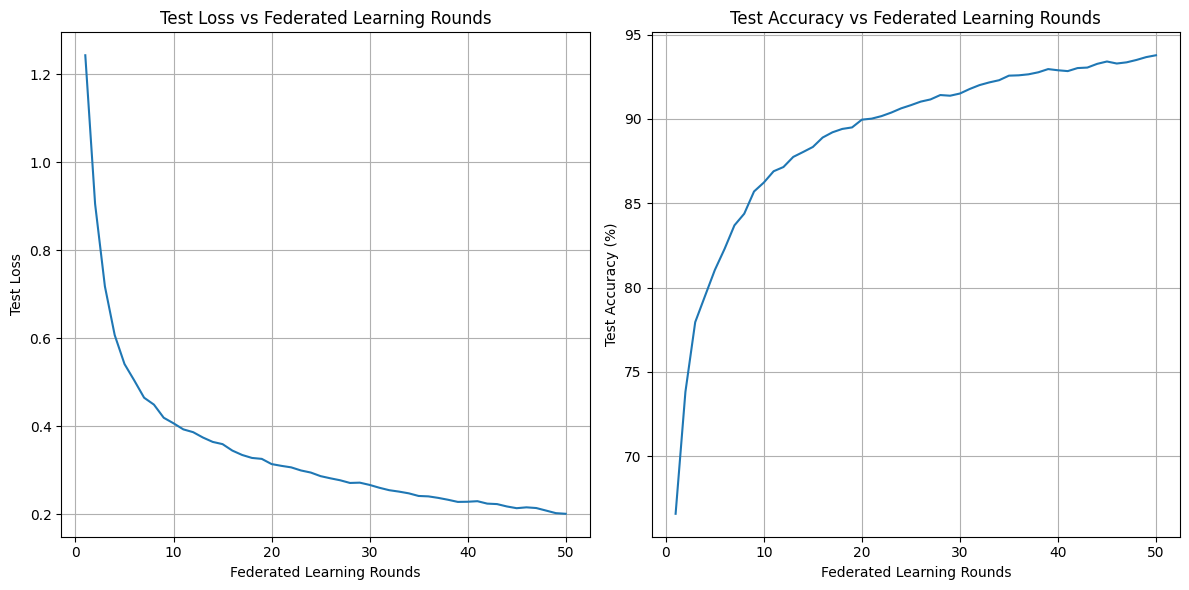

Final Test Accuracy: 93.78 %
None
[0.6658, 0.7381, 0.7795, 0.795, 0.8104, 0.823, 0.8369, 0.8438, 0.857, 0.8623, 0.869, 0.8715, 0.8775, 0.8804, 0.8834, 0.889, 0.8921, 0.8941, 0.895, 0.8996, 0.9002, 0.9017, 0.9038, 0.9063, 0.9082, 0.9103, 0.9116, 0.9142, 0.9138, 0.9151, 0.9178, 0.9201, 0.9217, 0.923, 0.9257, 0.9259, 0.9265, 0.9277, 0.9296, 0.9289, 0.9284, 0.9302, 0.9305, 0.9327, 0.9341, 0.9329, 0.9336, 0.935, 0.9367, 0.9378]
[1.2427456089019775, 0.9050557012557984, 0.7177864086151123, 0.6071872735500335, 0.5414220456123352, 0.5039486708164215, 0.46493082933425905, 0.44927641768455506, 0.4194231946468353, 0.4068213555812836, 0.39303439216613767, 0.3866938944816589, 0.37451689443588254, 0.3645516901016235, 0.3595268810749054, 0.3448415294647217, 0.334882221364975, 0.328155029296875, 0.3260303013801575, 0.31422755868434904, 0.31018423914909365, 0.3067514199972153, 0.2996861849546433, 0.2949703700065613, 0.2868086191177368, 0.28188755745887756, 0.27740776023864744, 0.2713355756521225, 0.2720

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from collections import Counter
import numpy as np
import random

from copy import deepcopy


# 设置随机种子
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# 设置一个固定的随机种子，例如 42
set_seed(42)

# 定义一个简单的神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建模型
def create_model():
    model = SimpleNN()
    return model

# 根据标签将训练集分配到不同客户端
def distribute_data_to_clients(train_dataset, num_clients=10):
    # 统计数据集原本的每个标签的数量
    original_label_counts = Counter(train_dataset.targets.tolist())
    print("Original dataset label counts:")
    for label, count in original_label_counts.items():
        print(f"Label {label}: {count} samples")

    clients = [[] for _ in range(num_clients)]

    for label in range(num_clients):
        indices = [i for i, target in enumerate(train_dataset.targets) if target == label]
        num_splits = num_clients - label
        split_indices = torch.chunk(torch.tensor(indices), num_splits)
        for i in range(num_splits):
            clients[label + i].extend(split_indices[i].tolist())

    client_subsets = [Subset(train_dataset, client_data) for client_data in clients]

    # 输出每个客户端的每个标签的数量
    for i, client_data in enumerate(client_subsets):
        client_targets = [train_dataset.targets[idx] for idx in client_data.indices]
        client_label_counts = Counter(client_targets)

        print(f"Client {i} label counts:")
        l = [0,0,0,0,0,0,0,0,0,0]
        for label, count in client_label_counts.items():
            if label == 0:
                l[0] += 1
            if label == 1:
                l[1] += 1
            if label == 2:
                l[2] += 1
            if label == 3:
                l[3] += 1
            if label == 4:
                l[4] += 1
            if label == 5:
                l[5] += 1
            if label == 6:
                l[6] += 1
            if label == 7:
                l[7] += 1
            if label == 8:
                l[8] += 1
            if label == 9:
                l[9] += 1
        print(l)

    return client_subsets

class EWC(object):
    def __init__(self, model, dataloader):
        self.model = model
        self.dataloader = dataloader

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        # Store a copy of model's current parameters as the mean (theta*)
        for n, p in deepcopy(self.params).items():
            self._means[n] = p.data.clone()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = p.data.clone()

        self.model.eval()

        # Use DataLoader for iterating over batches
        for inputs, targets in self.dataloader:
            self.model.zero_grad()

            # Forward pass
            output = self.model(inputs)
            loss = nn.CrossEntropyLoss()(output, targets)

            # Backward pass
            loss.backward()

            # Update precision matrices
            for n, p in self.model.named_parameters():
                precision_matrices[n] += p.grad.data ** 2 / len(self.dataloader.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model):
        loss = 0
        for n, p in model.named_parameters():
            # Penalty term based on precision and distance from original weights
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

# Training loop with EWC regularization
def train_with_ewc(model, data_loader, criterion, optimizer, ewc, epochs, importance):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in data_loader:

            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets) + importance * ewc.penalty(model)
            epoch_loss += loss.item()
            
            # Backward pass and update weights
            loss.backward()
            optimizer.step()

def train_without_ewc(model, data_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            epoch_loss += loss.item()
            
            # Backward pass and update weights
            loss.backward()
            optimizer.step()

# 联邦加权平均函数，考虑各客户端的数据量
def federated_weighted_avg(weights, num_samples):
    avg_weights = []
    total_samples = sum(num_samples)
    for i in range(len(weights[0])):
        weighted_sum = sum(weights[j][i] * num_samples[j] / total_samples for j in range(len(weights)))
        avg_weights.append(weighted_sum)
    return avg_weights

def federated_learning(global_model, client_subsets, criterion, hyperparams, test_loader=None):
    num_rounds = hyperparams.get('num_rounds', 5)
    learning_rate = hyperparams.get('learning_rate', 0.01)
    batch_size = hyperparams.get('batch_size', 64)
    epochs_per_client = hyperparams.get('epochs_per_client', 1)
    lambda_ewc = hyperparams.get('lambda_ewc', 0.1)

    loss_history = []
    accuracy_history = []

    for round_num in range(num_rounds):
        client_weights = []
        num_samples = []

        for client_data in client_subsets:
            client_loader = torch.utils.data.DataLoader(client_data, batch_size=batch_size, shuffle=True)
            model = create_model()
            model.load_state_dict(global_model.state_dict())
            
            ewc = EWC(model, client_loader)
            optimizer = optim.SGD(model.parameters(), lr=learning_rate)
            if lambda_ewc is not None:
                # print("with ewc")
                train_with_ewc(model, client_loader, criterion, optimizer, ewc, epochs=epochs_per_client, importance=lambda_ewc)
            else:
                # print("without ewc")
                train_without_ewc(model, client_loader, criterion, optimizer, epochs=epochs_per_client)

            model_weights = [param.data.clone() for param in model.parameters()]
            client_weights.append(model_weights)
            num_samples.append(len(client_data))

        new_weights = federated_weighted_avg(client_weights, num_samples)
        state_dict = global_model.state_dict()
        new_state_dict = {key: value for key, value in zip(state_dict.keys(), new_weights)}
        global_model.load_state_dict(new_state_dict)

        if test_loader is not None:
            test_loss, accuracy = test(global_model, test_loader, criterion)
            loss_history.append(test_loss)
            accuracy_history.append(accuracy)
            print(f'Round {round_num + 1} Test Loss: {test_loss:.4f} and Test Accuracy: {accuracy * 100:.2f} %')

    if test_loader is not None and loss_history and accuracy_history:
        plot_loss_accuracy_history(loss_history, accuracy_history)

    final_accuracy = accuracy_history[-1] if accuracy_history else None

    return loss_history, accuracy_history, final_accuracy

# 测试函数
def test(model, data_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = correct / total
    test_loss /= total
    return test_loss, accuracy

def plot_loss_accuracy_history(loss_history, accuracy_history):
    """
    绘制测试损失和准确率随联邦学习轮次的变化图。

    参数:
    - loss_history: 损失历史列表。
    - accuracy_history: 准确率历史列表。
    """
    x_values = list(range(1, len(loss_history) + 1))
    y_values_loss = loss_history
    y_values_accuracy = [acc * 100 for acc in accuracy_history]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_values, y_values_loss)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Loss')
    plt.title('Test Loss vs Federated Learning Rounds')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x_values, y_values_accuracy)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Test Accuracy vs Federated Learning Rounds')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    final_accuracy = accuracy_history[-1]
    print(f'Final Test Accuracy: {final_accuracy * 100:.2f} %')

transform = transforms.Compose([
    transforms.ToTensor(),
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 调用函数
client_subsets = distribute_data_to_clients(train_dataset, num_clients=10)

# 创建测试数据加载器
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 调用 federated_learning 函数时传入超参数字典
hyperparams = {
    'num_rounds': 50,
    'learning_rate': 0.01,
    'batch_size': 64,
    'epochs_per_client': 5,
    'lambda_ewc': None
}

loss_history, accuracy_history, final_accuracy = federated_learning(
    global_model=create_model(),
    client_subsets=client_subsets,
    criterion=nn.CrossEntropyLoss(),
    hyperparams=hyperparams,
    test_loader=test_loader
)
print(hyperparams['lambda_ewc'])
print(accuracy_history)
print(loss_history)


50round

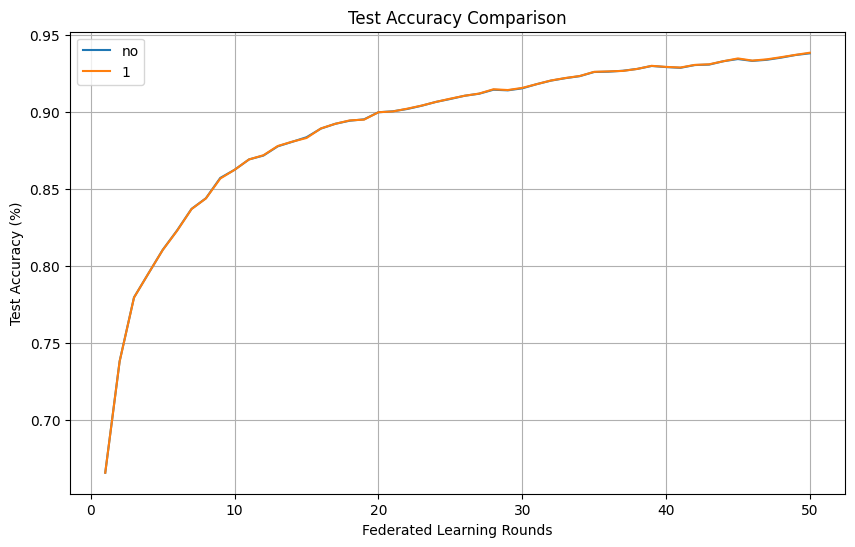

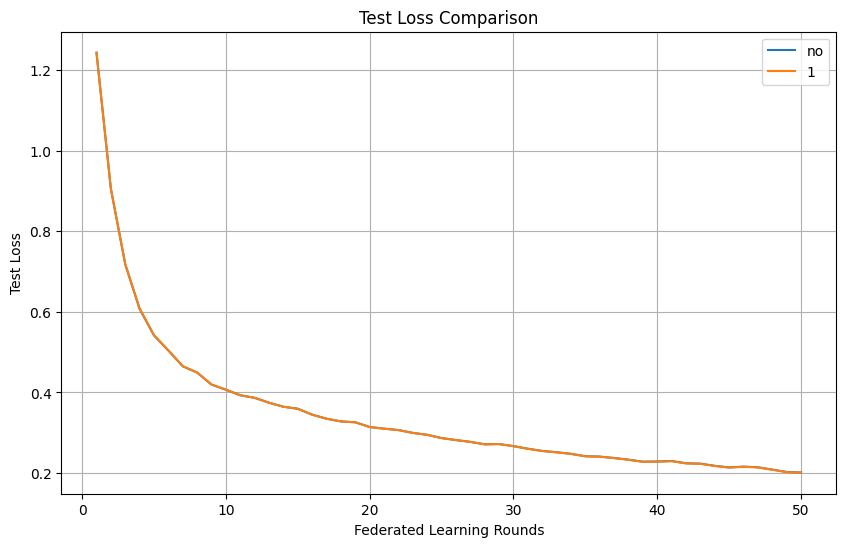

In [34]:
import matplotlib.pyplot as plt

# 定义数据
methods = ['no', '1']
data = {
    'no': {
        'x_values': [i for i in range(1, 51)],
        'y_values': [0.6658, 0.7381, 0.7795, 0.795, 0.8104, 0.823, 0.8369, 0.8438, 0.857, 0.8623, 0.869, 0.8715, 0.8775, 0.8804, 0.8834, 0.889, 0.8921, 0.8941, 0.895, 0.8996, 0.9002, 0.9017, 0.9038, 0.9063, 0.9082, 0.9103, 0.9116, 0.9142, 0.9138, 0.9151, 0.9178, 0.9201, 0.9217, 0.923, 0.9257, 0.9259, 0.9265, 0.9277, 0.9296, 0.9289, 0.9284, 0.9302, 0.9305, 0.9327, 0.9341, 0.9329, 0.9336, 0.935, 0.9367, 0.9378]

    },
    '1': {
        'x_values': [i for i in range(1, 51)],
        'y_values': [0.6658, 0.738, 0.7794, 0.795, 0.8103, 0.8228, 0.8368, 0.8437, 0.8566, 0.8623, 0.869, 0.8717, 0.8777, 0.8805, 0.8829, 0.8891, 0.8921, 0.8943, 0.8948, 0.8996, 0.9001, 0.9019, 0.9039, 0.9063, 0.9084, 0.9103, 0.9117, 0.9145, 0.914, 0.9154, 0.9178, 0.9202, 0.9218, 0.9231, 0.9258, 0.9261, 0.9264, 0.9277, 0.9297, 0.929, 0.9286, 0.9303, 0.9307, 0.9327, 0.9345, 0.9331, 0.9339, 0.9353, 0.9368, 0.9382]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

methods = ['no', '1']
data = {
    'no': {
        'x_values': [i for i in range(1, 51)],
        'y_values': [1.2427456089019775, 0.9050557012557984, 0.7177864086151123, 0.6071872735500335, 0.5414220456123352, 0.5039486708164215, 0.46493082933425905, 0.44927641768455506, 0.4194231946468353, 0.4068213555812836, 0.39303439216613767, 0.3866938944816589, 0.37451689443588254, 0.3645516901016235, 0.3595268810749054, 0.3448415294647217, 0.334882221364975, 0.328155029296875, 0.3260303013801575, 0.31422755868434904, 0.31018423914909365, 0.3067514199972153, 0.2996861849546433, 0.2949703700065613, 0.2868086191177368, 0.28188755745887756, 0.27740776023864744, 0.2713355756521225, 0.27200984160900116, 0.26688763298988344, 0.26040560433864596, 0.25488033978939056, 0.25167167398929596, 0.24773846638202668, 0.24178754909038544, 0.24084714679718017, 0.23742612416744233, 0.23316993279457093, 0.2282743841767311, 0.2286474154472351, 0.22990618060827256, 0.22439397271871567, 0.22333296725749968, 0.21795472621917725, 0.21400072227716446, 0.21595533782243728, 0.2143710945367813, 0.20859789009094237, 0.20276320139169693, 0.20128255985975266]
    },
    '1': {
        'x_values': [i for i in range(1, 51)],
        'y_values': [1.242741972064972, 0.9053313998222351, 0.7183353892326355, 0.6078032054901124, 0.541910576915741, 0.5043174164772034, 0.46517237935066225, 0.44946587042808533, 0.4195527914524078, 0.406874880695343, 0.393064120054245, 0.38665355672836305, 0.37440851306915285, 0.3644827482700348, 0.35947473196983337, 0.3447724413394928, 0.33477420635223387, 0.32798987951278685, 0.3258739437580109, 0.3141263630151749, 0.3100576215267181, 0.3066012077331543, 0.29954330208301544, 0.2948612423658371, 0.28671268603801725, 0.28179973151683807, 0.2773302592039108, 0.27125365133285523, 0.2718941938638687, 0.2666539292812347, 0.2602471076488495, 0.2546921058893204, 0.2514674180746079, 0.24751972219944, 0.2415530202627182, 0.2405681542634964, 0.23711426503658295, 0.23287825207710267, 0.227960014462471, 0.2282700304746628, 0.22948953659534455, 0.22398155751228332, 0.2229015704870224, 0.2175608361840248, 0.21359135261774062, 0.21553477900028228, 0.21398066687583922, 0.20820336762666702, 0.20236043552160263, 0.20086272308826447]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

10round

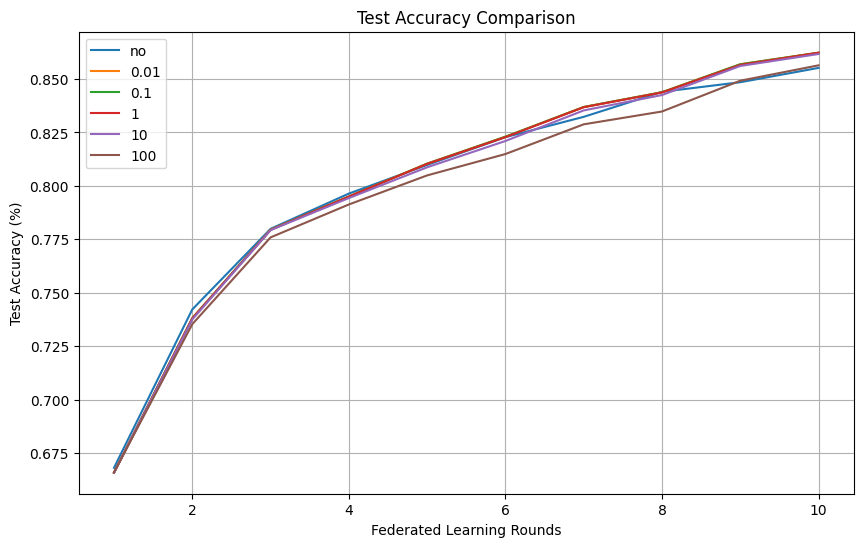

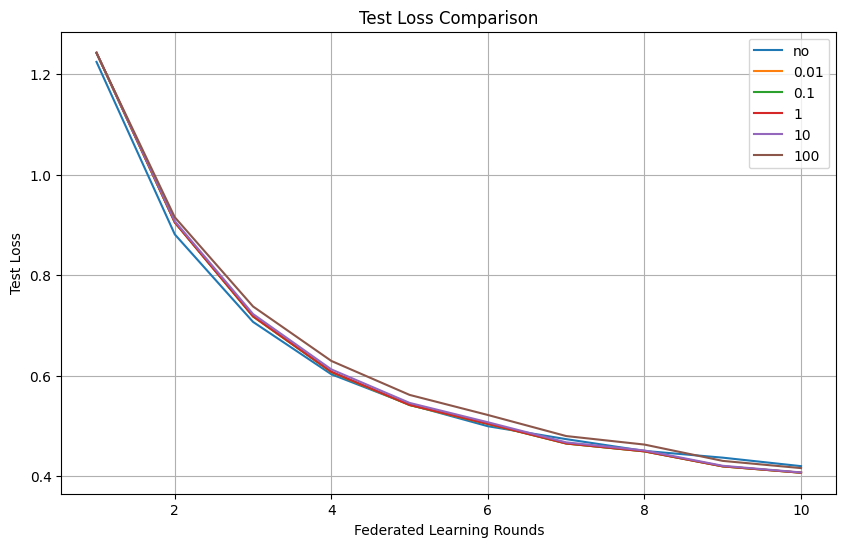

In [3]:
import matplotlib.pyplot as plt

# 定义数据
methods = ['no','0.01', '0.1', '1','10','100']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.6681, 0.7422, 0.7799, 0.7964, 0.8098, 0.8228, 0.8323, 0.844, 0.8485, 0.8552]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.6658, 0.7381, 0.7795, 0.795, 0.8104, 0.823, 0.8369, 0.8438, 0.8569, 0.8623]
    },
    '0.1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.6658, 0.7381, 0.7795, 0.795, 0.8104, 0.823, 0.8369, 0.8438, 0.8569, 0.8623]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.6658, 0.738, 0.7794, 0.795, 0.8103, 0.8228, 0.8368, 0.8437, 0.8566, 0.8623]
    },
    '10': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.6658, 0.7375, 0.7793, 0.7943, 0.8087, 0.821, 0.8353, 0.8425, 0.8561, 0.8617]
    },
    '100': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.666, 0.7353, 0.7759, 0.7913, 0.8049, 0.8149, 0.8288, 0.8348, 0.8492, 0.8564]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

methods = ['no','0.01', '0.1', '1','10','100']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [1.2245096341133117, 0.8811999466896057, 0.7069596102714538, 0.6027814431667328, 0.5423240572452546, 0.4993448727607727, 0.4736508019924164, 0.4502193640232086, 0.43679199986457823, 0.4198926216125488]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [1.2427445983886718, 0.9050560013771057, 0.7177894618034363, 0.6071957857608795, 0.5414263094902039, 0.5039568229198456, 0.46492750205993655, 0.44927691702842715, 0.4194348732471466, 0.4068292187213898]
    },
    '0.1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [1.2427393416404724, 0.9050779540061951, 0.7178474031448364, 0.6072522693634034, 0.5414683197021485, 0.5039901198387146, 0.46493504571914673, 0.4492842118740082, 0.4194437220096588, 0.4068260940551758]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [1.242741972064972, 0.9053313998222351, 0.7183353892326355, 0.6078032054901124, 0.541910576915741, 0.5043174164772034, 0.46517237935066225, 0.44946587042808533, 0.4195527914524078, 0.406874880695343]
    },
    '10': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [1.2426991885185241, 0.9075551984786987, 0.7226133604049683, 0.6124678480148316, 0.5457659667015076, 0.5072591949939728, 0.46726165432929995, 0.45111709370613096, 0.4206216479301453, 0.40740985407829283]
    },
    '100': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [1.2418791566848755, 0.9152809774398803, 0.7376663022041321, 0.6293105951309204, 0.5616857983112336, 0.5217093017101287, 0.4798066895484924, 0.4628392686843872, 0.430367636346817, 0.4160041264533997]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

使用一个client一个标签

Original dataset label counts:
Label 5: 5421 samples
Label 0: 5923 samples
Label 4: 5842 samples
Label 1: 6742 samples
Label 9: 5949 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Client 0 label counts:
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Client 1 label counts:
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Client 2 label counts:
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Client 3 label counts:
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Client 4 label counts:
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Client 5 label counts:
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Client 6 label counts:
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Client 7 label counts:
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Client 8 label counts:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Client 9 label counts:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Round 1 Test Loss: 2.2352 and Test Accuracy: 20.97 %
Round 2 Test Loss: 2.1550 and Test Accuracy: 33.70 %
Round 3 Test Loss: 2.0798 and Test Accuracy: 40.91 %
Round 4 Test Loss: 2.0113 and Test Accuracy: 49.01

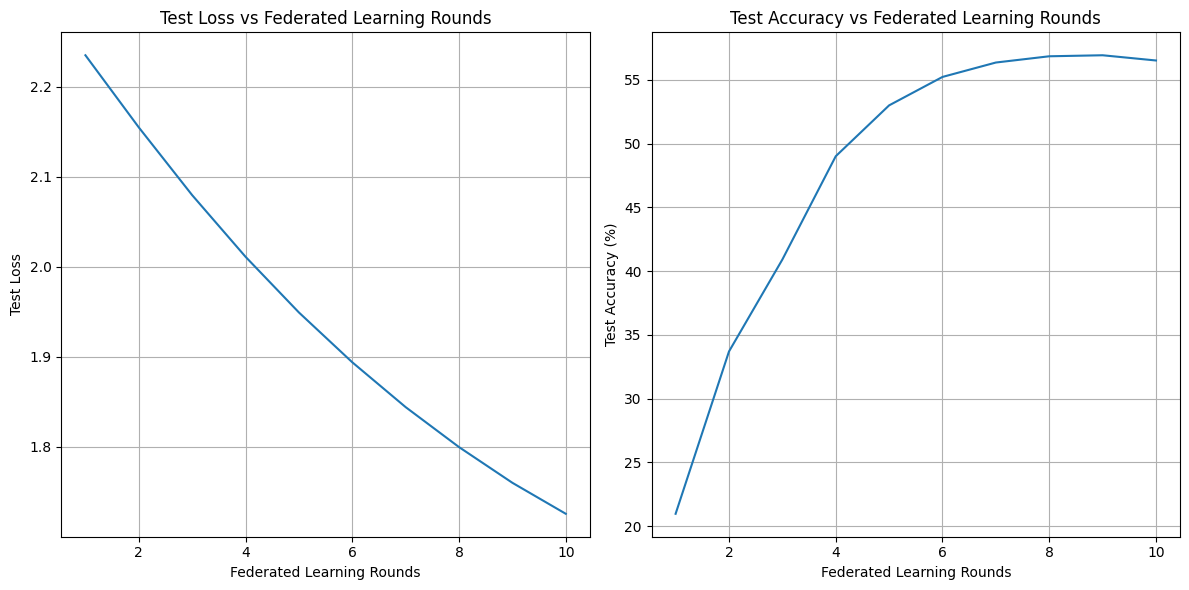

Final Test Accuracy: 56.52 %
100
[0.2097, 0.337, 0.4091, 0.4901, 0.53, 0.5523, 0.5636, 0.5685, 0.5693, 0.5652]
[2.235158599090576, 2.155031430053711, 2.0797601959228516, 2.011281497001648, 1.9494240537643432, 1.8940700624465943, 1.8442545902252196, 1.799857264137268, 1.760178627204895, 1.7257720880508423]


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from collections import Counter
import numpy as np
import random

from copy import deepcopy


# 设置随机种子
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# 设置一个固定的随机种子，例如 42
set_seed(42)

# 定义一个简单的神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建模型
def create_model():
    model = SimpleNN()
    return model

# 根据标签将训练集分配到不同客户端
def distribute_data_to_clients(train_dataset, num_clients=10):
    # 统计数据集原本的每个标签的数量
    original_label_counts = Counter(train_dataset.targets.tolist())
    print("Original dataset label counts:")
    for label, count in original_label_counts.items():
        print(f"Label {label}: {count} samples")

    clients = [[] for _ in range(num_clients)]

    # 每个客户端只分配一个特定的标签
    for label in range(num_clients):
        # 找到该标签对应的样本索引
        indices = [i for i, target in enumerate(train_dataset.targets) if target == label]
        # 将这些索引分配给对应的客户端
        clients[label].extend(indices)

    # 将每个客户端的数据生成Subset对象
    client_subsets = [Subset(train_dataset, client_data) for client_data in clients]

    # 输出每个客户端的每个标签的数量
    for i, client_data in enumerate(client_subsets):
        client_targets = [train_dataset.targets[idx] for idx in client_data.indices]
        client_label_counts = Counter(client_targets)

        print(f"Client {i} label counts:")
        l = [0] * 10  # 初始化标签计数列表
        for label, count in client_label_counts.items():
            l[label] = count
        print(l)

    return client_subsets

class EWC(object):
    def __init__(self, model, dataloader):
        self.model = model
        self.dataloader = dataloader

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        # Store a copy of model's current parameters as the mean (theta*)
        for n, p in deepcopy(self.params).items():
            self._means[n] = p.data.clone()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = p.data.clone()

        self.model.eval()

        # Use DataLoader for iterating over batches
        for inputs, targets in self.dataloader:
            self.model.zero_grad()

            # Forward pass
            output = self.model(inputs)
            loss = nn.CrossEntropyLoss()(output, targets)

            # Backward pass
            loss.backward()

            # Update precision matrices
            for n, p in self.model.named_parameters():
                precision_matrices[n] += p.grad.data ** 2 / len(self.dataloader.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model):
        loss = 0
        for n, p in model.named_parameters():
            # Penalty term based on precision and distance from original weights
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

# Training loop with EWC regularization
def train_with_ewc(model, data_loader, criterion, optimizer, ewc, epochs, importance):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in data_loader:

            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets) + importance * ewc.penalty(model)
            epoch_loss += loss.item()
            
            # Backward pass and update weights
            loss.backward()
            optimizer.step()

def train_without_ewc(model, data_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in data_loader:
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            epoch_loss += loss.item()
            
            # Backward pass and update weights
            loss.backward()
            optimizer.step()


# 联邦加权平均函数，考虑各客户端的数据量
def federated_weighted_avg(weights, num_samples):
    avg_weights = []
    total_samples = sum(num_samples)
    for i in range(len(weights[0])):
        weighted_sum = sum(weights[j][i] * num_samples[j] / total_samples for j in range(len(weights)))
        avg_weights.append(weighted_sum)
    return avg_weights

def federated_learning(global_model, client_subsets, criterion, hyperparams, test_loader=None):
    num_rounds = hyperparams.get('num_rounds', 5)
    learning_rate = hyperparams.get('learning_rate', 0.01)
    batch_size = hyperparams.get('batch_size', 64)
    epochs_per_client = hyperparams.get('epochs_per_client', 1)
    lambda_ewc = hyperparams.get('lambda_ewc', 0.1)

    loss_history = []
    accuracy_history = []

    for round_num in range(num_rounds):
        client_weights = []
        num_samples = []

        for client_data in client_subsets:
            client_loader = torch.utils.data.DataLoader(client_data, batch_size=batch_size, shuffle=True)
            model = create_model()
            model.load_state_dict(global_model.state_dict())
            
            ewc = EWC(model, client_loader)
            optimizer = optim.SGD(model.parameters(), lr=learning_rate)
            if lambda_ewc is not None:
                # print("with ewc")
                train_with_ewc(model, client_loader, criterion, optimizer, ewc, epochs=epochs_per_client, importance=lambda_ewc)
            else:
                # print("without ewc")
                train_without_ewc(model, client_loader, criterion, optimizer, epochs=epochs_per_client)

            model_weights = [param.data.clone() for param in model.parameters()]
            client_weights.append(model_weights)
            num_samples.append(len(client_data))

        new_weights = federated_weighted_avg(client_weights, num_samples)
        state_dict = global_model.state_dict()
        new_state_dict = {key: value for key, value in zip(state_dict.keys(), new_weights)}
        global_model.load_state_dict(new_state_dict)

        if test_loader is not None:
            test_loss, accuracy = test(global_model, test_loader, criterion)
            loss_history.append(test_loss)
            accuracy_history.append(accuracy)
            print(f'Round {round_num + 1} Test Loss: {test_loss:.4f} and Test Accuracy: {accuracy * 100:.2f} %')

    if test_loader is not None and loss_history and accuracy_history:
        plot_loss_accuracy_history(loss_history, accuracy_history)

    final_accuracy = accuracy_history[-1] if accuracy_history else None

    return loss_history, accuracy_history, final_accuracy

# 测试函数
def test(model, data_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = correct / total
    test_loss /= total
    return test_loss, accuracy

def plot_loss_accuracy_history(loss_history, accuracy_history):
    """
    绘制测试损失和准确率随联邦学习轮次的变化图。

    参数:
    - loss_history: 损失历史列表。
    - accuracy_history: 准确率历史列表。
    """
    x_values = list(range(1, len(loss_history) + 1))
    y_values_loss = loss_history
    y_values_accuracy = [acc * 100 for acc in accuracy_history]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_values, y_values_loss)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Loss')
    plt.title('Test Loss vs Federated Learning Rounds')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x_values, y_values_accuracy)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Test Accuracy vs Federated Learning Rounds')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    final_accuracy = accuracy_history[-1]
    print(f'Final Test Accuracy: {final_accuracy * 100:.2f} %')

transform = transforms.Compose([
    transforms.ToTensor(),
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 调用函数
client_subsets = distribute_data_to_clients(train_dataset, num_clients=10)

# 创建测试数据加载器
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 调用 federated_learning 函数时传入超参数字典
hyperparams = {
    'num_rounds': 10,
    'learning_rate': 0.01,
    'batch_size': 64,
    'epochs_per_client': 5,
    'lambda_ewc': 100
}

loss_history, accuracy_history, final_accuracy = federated_learning(
    global_model=create_model(),
    client_subsets=client_subsets,
    criterion=nn.CrossEntropyLoss(),
    hyperparams=hyperparams,
    test_loader=test_loader
)
print(hyperparams['lambda_ewc'])
print(accuracy_history)
print(loss_history)


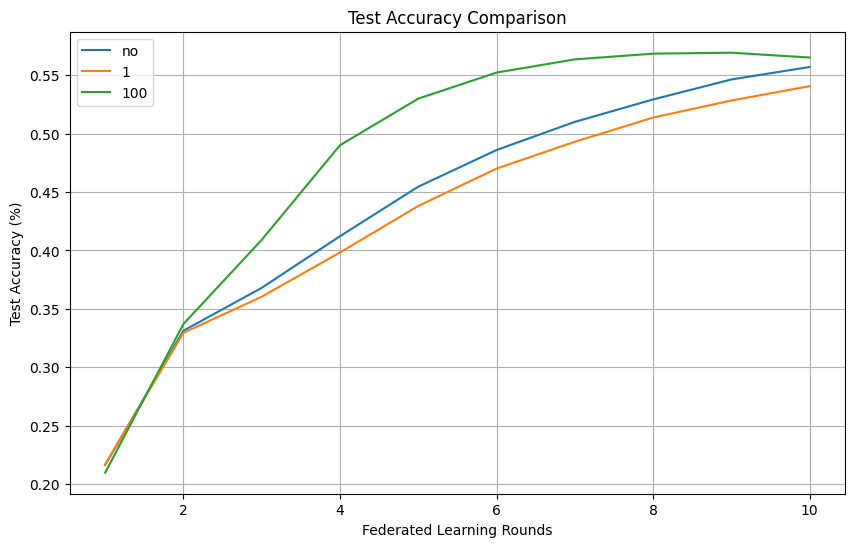

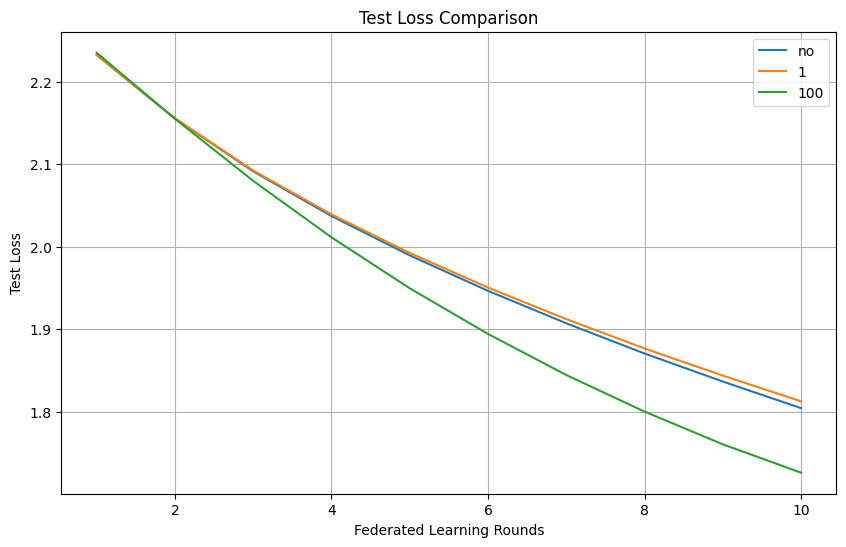

In [14]:
import matplotlib.pyplot as plt

# 定义数据
methods = ['no','0.01', '1','100']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.2164, 0.3313, 0.368, 0.4122, 0.4546, 0.486, 0.5101, 0.5293, 0.5464, 0.5571]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.2165, 0.3313, 0.3677, 0.4122, 0.4545, 0.4859, 0.5098, 0.5292, 0.546, 0.5569]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.2167, 0.3295, 0.3604, 0.3983, 0.4381, 0.4701, 0.4931, 0.5138, 0.5284, 0.5407]
    },
    '100': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.2097, 0.337, 0.4091, 0.4901, 0.53, 0.5523, 0.5636, 0.5685, 0.5693, 0.5652]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

methods = ['no','0.01', '1','100']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.2324823974609376, 2.155340606689453, 2.091267894744873, 2.0370664337158204, 1.9893400156021117, 1.946326865386963, 1.9070037506103517, 1.8703331165313721, 1.8363327049255371, 1.8040611415863037]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.232482365036011, 2.155344149398804, 2.0912795791625975, 2.0370896575927735, 1.989376866722107, 1.9463786504745484, 1.9070711267471314, 1.8704171644210816, 1.836433588027954, 1.8041798084259033]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.2324783222198485, 2.1556832145690916, 2.092305324935913, 2.0390176750183104, 1.9922854387283324, 1.9503180089950563, 1.9120307399749756, 1.8764457719802856, 1.8435022226333617, 1.8123407453536988]
    },
    '100': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.235158599090576, 2.155031430053711, 2.0797601959228516, 2.011281497001648, 1.9494240537643432, 1.8940700624465943, 1.8442545902252196, 1.799857264137268, 1.760178627204895, 1.7257720880508423]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

普通机器学习模型

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from collections import Counter

from torch.nn import functional as F
from torch.autograd import Variable
from copy import deepcopy

# 设置随机种子
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# 设置一个固定的随机种子，例如 42
set_seed(42)

def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

# 定义 2NN 模型
class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = torch.flatten(x, 1)  # 展平输入
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 定义 EWC 类
class EWC(object):
    def __init__(self, model, data_loader: torch.utils.data.DataLoader):

        self.model = model
        self.data_loader = data_loader

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)

        self.model.eval()
        for input, _ in self.data_loader:
            self.model.zero_grad()
            input = variable(input)
            output = self.model(input).view(1, -1)
            label = output.max(1)[1].view(-1)
            loss = F.nll_loss(F.log_softmax(output, dim=1), label)
            loss.backward()

            for n, p in self.model.named_parameters():
                precision_matrices[n].data += p.grad.data ** 2 / len(self.data_loader)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

# 准备 MNIST 数据集
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 超参数
input_size = 28 * 28  # MNIST 图像大小 28x28
hidden_size = 200  # 隐藏层神经元个数
num_classes = 10  # 类别数
num_epochs = 10
learning_rate = 0.01
lambda_ewc = 100

# 创建模型、损失函数和优化器
model = TwoLayerNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 创建 EWC 实例
ewc = EWC(model, train_loader)

# 训练模型
# 初始化保存损失和准确率的列表
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        if lambda_ewc is not None:
            # print("EWC penalty term added")
            loss = criterion(outputs, targets) + lambda_ewc * ewc.penalty(model)  # 添加 EWC 惩罚项
        else:
            # print("EWC penalty term not added")
            loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # 计算每个 epoch 的测试损失和准确率
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    average_loss = test_loss / len(test_loader)
    
    # 保存测试损失和准确率
    test_losses.append(average_loss)
    test_accuracies.append(accuracy)
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Test Loss: {average_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

print(lambda_ewc)
print(test_accuracies)
print(test_losses)


Epoch [1/10], Test Loss: 0.5552, Test Accuracy: 87.19%
Epoch [2/10], Test Loss: 0.4249, Test Accuracy: 89.42%
Epoch [3/10], Test Loss: 0.3787, Test Accuracy: 90.16%
Epoch [4/10], Test Loss: 0.3496, Test Accuracy: 90.64%
Epoch [5/10], Test Loss: 0.3327, Test Accuracy: 91.13%
Epoch [6/10], Test Loss: 0.3093, Test Accuracy: 91.59%
Epoch [7/10], Test Loss: 0.3049, Test Accuracy: 91.87%
Epoch [8/10], Test Loss: 0.2931, Test Accuracy: 92.04%
Epoch [9/10], Test Loss: 0.2838, Test Accuracy: 92.11%
Epoch [10/10], Test Loss: 0.2730, Test Accuracy: 92.69%
100
[87.19, 89.42, 90.16, 90.64, 91.13, 91.59, 91.87, 92.04, 92.11, 92.69]
[0.5551972564808123, 0.42489558885431594, 0.3787214110136791, 0.34961007226994084, 0.3326543355064028, 0.30932344149821883, 0.30490521464947684, 0.2931042487738998, 0.28376831317166235, 0.2730030083233953]


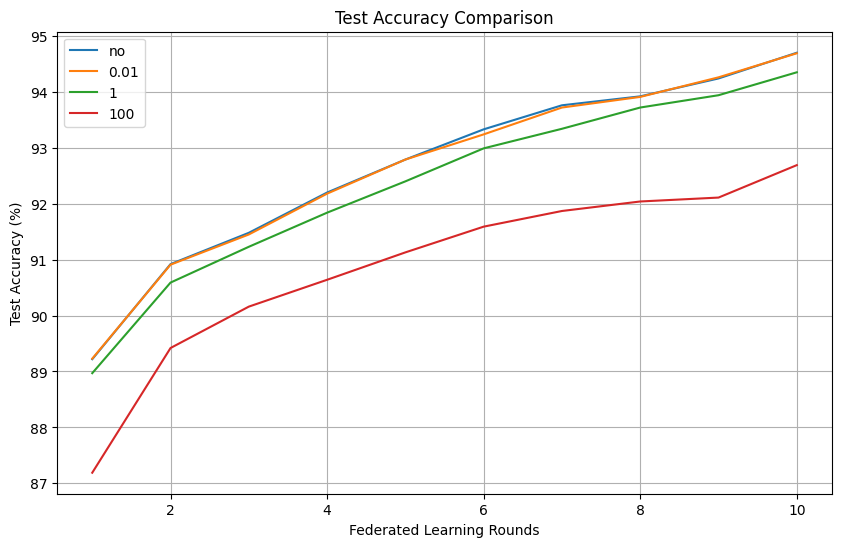

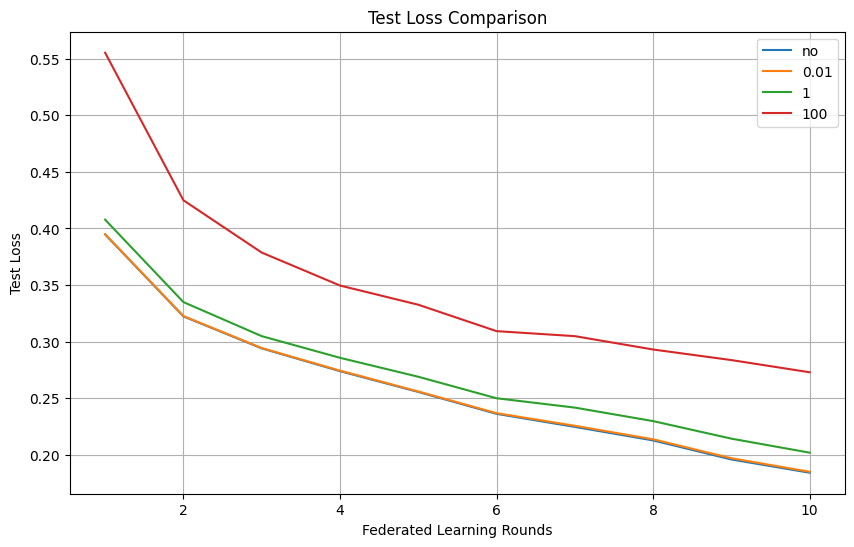

In [28]:
import matplotlib.pyplot as plt

# 定义数据
methods = ['no','0.01', '1','100']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [89.22, 90.92, 91.48, 92.2, 92.79, 93.33, 93.76, 93.92, 94.24, 94.7]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [89.23, 90.91, 91.45, 92.18, 92.79, 93.24, 93.72, 93.91, 94.26, 94.69]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [88.97, 90.59, 91.23, 91.84, 92.4, 92.99, 93.34, 93.72, 93.94, 94.35]
    },
    '100': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [87.19, 89.42, 90.16, 90.64, 91.13, 91.59, 91.87, 92.04, 92.11, 92.69]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

methods = ['no','0.01','1','100']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.394719310081119, 0.3223610234440892, 0.2941186102522407, 0.27399058050363306, 0.25563451327430975, 0.23628730052239766, 0.22477112712255518, 0.21281077539560142, 0.19599919480265707, 0.18429276406183648]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.3949547648951886, 0.3226465223013026, 0.29440149878430516, 0.2744559264225755, 0.2560607648341899, 0.2368960084725812, 0.22576628984278366, 0.21381836170389965, 0.19706761176181828, 0.18513801992592063]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.4077718117197228, 0.33498373409365395, 0.3049133247488244, 0.28578198615722594, 0.26904273931245515, 0.25005740021017325, 0.24179795341696708, 0.2298777387803717, 0.21437781299375425, 0.20200536195426042]
    },
    '100': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.5551972564808123, 0.42489558885431594, 0.3787214110136791, 0.34961007226994084, 0.3326543355064028, 0.30932344149821883, 0.30490521464947684, 0.2931042487738998, 0.28376831317166235, 0.2730030083233953]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from collections import Counter
import numpy as np
import random

from torch.nn import functional as F
from torch.autograd import Variable
from copy import deepcopy


# 设置随机种子
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# 设置一个固定的随机种子，例如 42
set_seed(42)

# 定义一个简单的神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建模型
def create_model():
    model = SimpleNN()
    return model

# 根据标签将训练集分配到不同客户端
def distribute_data_to_clients(train_dataset, num_clients=10):
    # 统计数据集原本的每个标签的数量
    original_label_counts = Counter(train_dataset.targets.tolist())
    print("Original dataset label counts:")
    for label, count in original_label_counts.items():
        print(f"Label {label}: {count} samples")

    clients = [[] for _ in range(num_clients)]

    for label in range(num_clients):
        indices = [i for i, target in enumerate(train_dataset.targets) if target == label]
        num_splits = num_clients - label
        split_indices = torch.chunk(torch.tensor(indices), num_splits)
        for i in range(num_splits):
            clients[label + i].extend(split_indices[i].tolist())

    client_subsets = [Subset(train_dataset, client_data) for client_data in clients]

    # 输出每个客户端的每个标签的数量
    for i, client_data in enumerate(client_subsets):
        client_targets = [train_dataset.targets[idx] for idx in client_data.indices]
        client_label_counts = Counter(client_targets)

        print(f"Client {i} label counts:")
        l = [0,0,0,0,0,0,0,0,0,0]
        for label, count in client_label_counts.items():
            if label == 0:
                l[0] += 1
            if label == 1:
                l[1] += 1
            if label == 2:
                l[2] += 1
            if label == 3:
                l[3] += 1
            if label == 4:
                l[4] += 1
            if label == 5:
                l[5] += 1
            if label == 6:
                l[6] += 1
            if label == 7:
                l[7] += 1
            if label == 8:
                l[8] += 1
            if label == 9:
                l[9] += 1
        print(l)

    return client_subsets

def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)


class EWC(object):
    def __init__(self, model, data_loader: torch.utils.data.DataLoader):

        self.model = model
        self.data_loader = data_loader

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)

        self.model.eval()
        for input, _ in self.data_loader:
            self.model.zero_grad()
            input = variable(input)
            output = self.model(input).view(1, -1)
            label = output.max(1)[1].view(-1)
            loss = F.nll_loss(F.log_softmax(output, dim=1), label)
            loss.backward()

            for n, p in self.model.named_parameters():
                precision_matrices[n].data += p.grad.data ** 2 / len(self.data_loader)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

# Training loop with EWC regularization
def train_with_ewc(model, data_loader, criterion, optimizer, ewc, epochs, importance):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, targets) in enumerate(data_loader):
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, targets)
            ewc_loss = importance * ewc.penalty(model)
            total_loss = loss + ewc_loss
            total_loss.backward()
            optimizer.step()

# 联邦加权平均函数，考虑各客户端的数据量
def federated_weighted_avg(weights, num_samples):
    avg_weights = []
    total_samples = sum(num_samples)
    for i in range(len(weights[0])):
        weighted_sum = sum(weights[j][i] * num_samples[j] / total_samples for j in range(len(weights)))
        avg_weights.append(weighted_sum)
    return avg_weights

def federated_learning(global_model, client_subsets, criterion, hyperparams, test_loader=None):
    num_rounds = hyperparams.get('num_rounds', 5)
    learning_rate = hyperparams.get('learning_rate', 0.01)
    batch_size = hyperparams.get('batch_size', 64)
    epochs_per_client = hyperparams.get('epochs_per_client', 1)
    lambda_ewc = hyperparams.get('lambda_ewc', 0.1)

    loss_history = []
    accuracy_history = []

    for round_num in range(num_rounds):
        client_weights = []
        num_samples = []

        for client_data in client_subsets:
            client_loader = torch.utils.data.DataLoader(client_data, batch_size=batch_size, shuffle=True)
            model = create_model()
            model.load_state_dict(global_model.state_dict())
            
            ewc = EWC(model, client_loader)
            optimizer = optim.SGD(model.parameters(), lr=learning_rate)
            train_with_ewc(model, client_loader, criterion, optimizer, ewc, epochs=epochs_per_client, importance=lambda_ewc)

            model_weights = [param.data.clone() for param in model.parameters()]
            client_weights.append(model_weights)
            num_samples.append(len(client_data))

        new_weights = federated_weighted_avg(client_weights, num_samples)
        state_dict = global_model.state_dict()
        new_state_dict = {key: value for key, value in zip(state_dict.keys(), new_weights)}
        global_model.load_state_dict(new_state_dict)

        if test_loader is not None:
            test_loss, accuracy = test(global_model, test_loader, criterion)
            loss_history.append(test_loss)
            accuracy_history.append(accuracy)
            print(f'Round {round_num + 1} Test Loss: {test_loss:.4f} and Test Accuracy: {accuracy * 100:.2f} %')

    if test_loader is not None and loss_history and accuracy_history:
        plot_loss_accuracy_history(loss_history, accuracy_history)

    final_accuracy = accuracy_history[-1] if accuracy_history else None

    return loss_history, accuracy_history, final_accuracy

# 测试函数
def test(model, data_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for data, targets in data_loader:
            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = correct / total
    test_loss /= total
    return test_loss, accuracy

def plot_loss_accuracy_history(loss_history, accuracy_history):
    """
    绘制测试损失和准确率随联邦学习轮次的变化图。

    参数:
    - loss_history: 损失历史列表。
    - accuracy_history: 准确率历史列表。
    """
    x_values = list(range(1, len(loss_history) + 1))
    y_values_loss = loss_history
    y_values_accuracy = [acc * 100 for acc in accuracy_history]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_values, y_values_loss)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Loss')
    plt.title('Test Loss vs Federated Learning Rounds')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x_values, y_values_accuracy)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Test Accuracy vs Federated Learning Rounds')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    final_accuracy = accuracy_history[-1]
    print(f'Final Test Accuracy: {final_accuracy * 100:.2f} %')

transform = transforms.Compose([
    transforms.ToTensor(),
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 调用函数
client_subsets = distribute_data_to_clients(train_dataset, num_clients=10)

# 创建测试数据加载器
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 调用 federated_learning 函数时传入超参数字典
hyperparams = {
    'num_rounds': 10,
    'learning_rate': 0.01,
    'batch_size': 64,
    'epochs_per_client': 5,
    'lambda_ewc': 1
}

loss_history, accuracy_history, final_accuracy = federated_learning(
    global_model=create_model(),
    client_subsets=client_subsets,
    criterion=nn.CrossEntropyLoss(),
    hyperparams=hyperparams,
    test_loader=test_loader
)
print(hyperparams['lambda_ewc'])
print(accuracy_history)
print(loss_history)


Original dataset label counts:
Label 5: 5421 samples
Label 0: 5923 samples
Label 4: 5842 samples
Label 1: 6742 samples
Label 9: 5949 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Client 0 label counts:
[593, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Client 1 label counts:
[593, 750, 0, 0, 0, 0, 0, 0, 0, 0]
Client 2 label counts:
[593, 750, 745, 0, 0, 0, 0, 0, 0, 0]
Client 3 label counts:
[593, 750, 745, 876, 0, 0, 0, 0, 0, 0]
Client 4 label counts:
[593, 750, 745, 876, 974, 0, 0, 0, 0, 0]
Client 5 label counts:
[593, 750, 745, 876, 974, 1085, 0, 0, 0, 0]
Client 6 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 0, 0, 0]
Client 7 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 2089, 0, 0]
Client 8 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 2089, 2926, 0]
Client 9 label counts:
[586, 742, 743, 875, 972, 1081, 1478, 2087, 2925, 5949]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

use cuda

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from collections import Counter
import numpy as np
import random
from copy import deepcopy

# 设置随机种子
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# 设置一个固定的随机种子，例如 42
set_seed(42)

# 检查CUDA可用性
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 定义一个简单的神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建模型
def create_model():
    model = SimpleNN().to(device)  # 将模型移动到设备
    return model

# 根据标签将训练集分配到不同客户端
def distribute_data_to_clients(train_dataset, num_clients=10):
    # 统计数据集原本的每个标签的数量
    original_label_counts = Counter(train_dataset.targets.tolist())
    print("Original dataset label counts:")
    for label, count in original_label_counts.items():
        print(f"Label {label}: {count} samples")

    clients = [[] for _ in range(num_clients)]

    for label in range(num_clients):
        indices = [i for i, target in enumerate(train_dataset.targets) if target == label]
        num_splits = num_clients - label
        split_indices = torch.chunk(torch.tensor(indices), num_splits)
        for i in range(num_splits):
            clients[label + i].extend(split_indices[i].tolist())

    client_subsets = [Subset(train_dataset, client_data) for client_data in clients]

    # 输出每个客户端的每个标签的数量
    for i, client_data in enumerate(client_subsets):
        client_targets = [train_dataset.targets[idx] for idx in client_data.indices]
        client_label_counts = Counter(client_targets)

        print(f"Client {i} label counts:")
        l = [0] * 10  # 10个标签
        for label, count in client_label_counts.items():
            l[label] += count
        print(l)

    return client_subsets

import torch
import torch.nn as nn
from copy import deepcopy

class EWC(object):
    def __init__(self, model, dataloader, device='cuda'):
        self.model = model.to(device)  # 将模型移动到指定的设备
        self.dataloader = dataloader
        self.device = device

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        # Store a copy of model's current parameters as the mean (theta*)
        for n, p in deepcopy(self.params).items():
            self._means[n] = p.data.clone()

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = p.data.clone()

        self.model.eval()

        # Use DataLoader for iterating over batches
        for inputs, targets in self.dataloader:
            inputs, targets = inputs.to(self.device), targets.to(self.device)  # 将输入和目标移动到设备
            self.model.zero_grad()

            # Forward pass
            output = self.model(inputs)
            loss = nn.CrossEntropyLoss()(output, targets)

            # Backward pass
            loss.backward()

            # Update precision matrices
            for n, p in self.model.named_parameters():
                precision_matrices[n] += p.grad.data ** 2 / len(self.dataloader.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model):
        loss = 0
        for n, p in model.named_parameters():
            # Penalty term based on precision and distance from original weights
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss


# Training loop with EWC regularization
def train_with_ewc(model, data_loader, criterion, optimizer, ewc, epochs, importance):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # 将数据移动到设备

            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets) + importance * ewc.penalty(model)
            epoch_loss += loss.item()
            
            # Backward pass and update weights
            loss.backward()
            optimizer.step()

# 联邦加权平均函数，考虑各客户端的数据量
def federated_weighted_avg(weights, num_samples):
    avg_weights = []
    total_samples = sum(num_samples)
    for i in range(len(weights[0])):
        weighted_sum = sum(weights[j][i] * num_samples[j] / total_samples for j in range(len(weights)))
        avg_weights.append(weighted_sum)
    return avg_weights

def federated_learning(global_model, client_subsets, criterion, hyperparams, test_loader=None):
    num_rounds = hyperparams.get('num_rounds', 5)
    learning_rate = hyperparams.get('learning_rate', 0.01)
    batch_size = hyperparams.get('batch_size', 64)
    epochs_per_client = hyperparams.get('epochs_per_client', 1)
    lambda_ewc = hyperparams.get('lambda_ewc', 0.1)

    loss_history = []
    accuracy_history = []

    for round_num in range(num_rounds):
        client_weights = []
        num_samples = []

        for client_data in client_subsets:
            client_loader = torch.utils.data.DataLoader(client_data, batch_size=batch_size, shuffle=True)
            model = create_model()
            model.load_state_dict(global_model.state_dict())
            
            ewc = EWC(model, client_loader)
            optimizer = optim.SGD(model.parameters(), lr=learning_rate)
            train_with_ewc(model, client_loader, criterion, optimizer, ewc, epochs=epochs_per_client, importance=lambda_ewc)

            model_weights = [param.data.clone() for param in model.parameters()]
            client_weights.append(model_weights)
            num_samples.append(len(client_data))

        new_weights = federated_weighted_avg(client_weights, num_samples)
        state_dict = global_model.state_dict()
        new_state_dict = {key: value for key, value in zip(state_dict.keys(), new_weights)}
        global_model.load_state_dict(new_state_dict)

        if test_loader is not None:
            test_loss, accuracy = test(global_model, test_loader, criterion)
            loss_history.append(test_loss)
            accuracy_history.append(accuracy)
            print(f'Round {round_num + 1} Test Loss: {test_loss:.4f} and Test Accuracy: {accuracy * 100:.2f} %')

    if test_loader is not None and loss_history and accuracy_history:
        plot_loss_accuracy_history(loss_history, accuracy_history)

    final_accuracy = accuracy_history[-1] if accuracy_history else None

    return loss_history, accuracy_history, final_accuracy

# 测试函数
def test(model, data_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for data, targets in data_loader:
            data, targets = data.to(device), targets.to(device)  # 将数据移动到设备

            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = correct / total
    test_loss /= total
    return test_loss, accuracy

def plot_loss_accuracy_history(loss_history, accuracy_history):
    """
    绘制测试损失和准确率随联邦学习轮次的变化图。

    参数:
    - loss_history: 损失历史列表。
    - accuracy_history: 准确率历史列表。
    """
    x_values = list(range(1, len(loss_history) + 1))
    y_values_loss = loss_history
    y_values_accuracy = [acc * 100 for acc in accuracy_history]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_values, y_values_loss)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Loss')
    plt.title('Test Loss vs Federated Learning Rounds')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x_values, y_values_accuracy)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Test Accuracy vs Federated Learning Rounds')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    final_accuracy = accuracy_history[-1]
    print(f'Final Test Accuracy: {final_accuracy * 100:.2f}%')

if __name__ == '__main__':
    # 数据加载和预处理
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # 分配数据给客户端
    client_subsets = distribute_data_to_clients(train_dataset, num_clients=10)

    global_model = create_model()  # 创建全局模型
    criterion = nn.CrossEntropyLoss()

    hyperparams = {
        'num_rounds': 50,
        'learning_rate': 0.01,
        'batch_size': 64,
        'epochs_per_client': 1,
        'lambda_ewc': 0.1
    }

    loss_history, accuracy_history, final_accuracy = federated_learning(
    global_model=create_model(),
    client_subsets=client_subsets,
    criterion=nn.CrossEntropyLoss(),
    hyperparams=hyperparams,
    test_loader=test_loader
    )
    print(hyperparams['lambda_ewc'])
    print(accuracy_history)
    print(loss_history)


Using device: cuda
Original dataset label counts:
Label 5: 5421 samples
Label 0: 5923 samples
Label 4: 5842 samples
Label 1: 6742 samples
Label 9: 5949 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Client 0 label counts:
[593, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Client 1 label counts:
[593, 750, 0, 0, 0, 0, 0, 0, 0, 0]
Client 2 label counts:
[593, 750, 745, 0, 0, 0, 0, 0, 0, 0]
Client 3 label counts:
[593, 750, 745, 876, 0, 0, 0, 0, 0, 0]
Client 4 label counts:
[593, 750, 745, 876, 974, 0, 0, 0, 0, 0]
Client 5 label counts:
[593, 750, 745, 876, 974, 1085, 0, 0, 0, 0]
Client 6 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 0, 0, 0]
Client 7 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 2089, 0, 0]
Client 8 label counts:
[593, 750, 745, 876, 974, 1085, 1480, 2089, 2926, 0]
Client 9 label counts:
[586, 742, 743, 875, 972, 1081, 1478, 2087, 2925, 5949]
Round 1 Test Loss: 1.9971 and Test Accuracy: 58.91 %
Round 2 Test

KeyboardInterrupt: 

采用论文中96客户的分类

Using device: cuda
Client 0 label counts:
[53, 73, 59, 53, 61, 54, 62, 73, 67, 69]
Client 1 label counts:
[66, 70, 54, 65, 59, 47, 70, 71, 65, 57]
Client 2 label counts:
[59, 66, 63, 67, 55, 56, 76, 63, 64, 55]
Client 3 label counts:
[52, 74, 58, 61, 77, 47, 63, 64, 60, 68]
Client 4 label counts:
[66, 63, 62, 72, 57, 53, 62, 75, 58, 56]
Client 5 label counts:
[57, 78, 63, 69, 71, 52, 58, 67, 57, 52]
Client 6 label counts:
[61, 63, 52, 57, 62, 55, 71, 72, 70, 61]
Client 7 label counts:
[62, 70, 55, 62, 63, 54, 58, 67, 69, 64]
Client 8 label counts:
[63, 67, 67, 62, 62, 42, 57, 78, 64, 62]
Client 9 label counts:
[65, 79, 64, 61, 63, 47, 64, 68, 54, 59]
Client 10 label counts:
[64, 76, 65, 66, 71, 51, 58, 57, 59, 57]
Client 11 label counts:
[65, 70, 71, 57, 48, 56, 65, 67, 61, 64]
Client 12 label counts:
[60, 69, 69, 71, 56, 54, 62, 62, 51, 70]
Client 13 label counts:
[52, 62, 62, 62, 73, 64, 62, 66, 63, 58]
Client 14 label counts:
[61, 62, 63, 75, 63, 59, 63, 61, 53, 64]
Client 15 label 

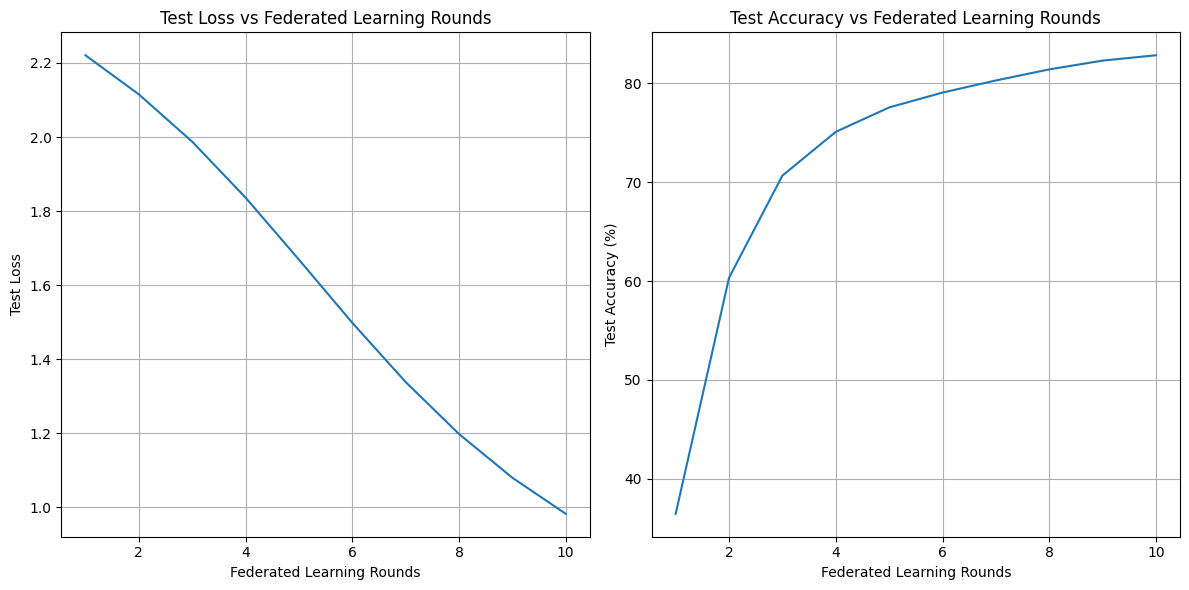

Final Test Accuracy: 82.85 %
10
[0.3644, 0.6033, 0.7067, 0.751, 0.7757, 0.7907, 0.803, 0.8142, 0.8231, 0.8285]
[2.220785145187378, 2.1153048576354982, 1.98755186214447, 1.8364454372406005, 1.6689541591644288, 1.4982899753570558, 1.3383394227981567, 1.1978339921951293, 1.079655593109131, 0.9822888792037964]


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import Subset
from collections import Counter
import numpy as np
import random




# 设置随机种子
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# 设置一个固定的随机种子，例如 42
set_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 定义一个简单的神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200).to(device)
        self.fc2 = nn.Linear(200, 10).to(device)

    def forward(self, x):
        x = x.view(-1, 28 * 28).to(device)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 创建模型
def create_model():
    model = SimpleNN()
    return model

# 根据标签将训练集分配到不同客户端
def distribute_data_to_clients(train_dataset, num_clients=96):
    # 计算每个块的数据量
    data_per_block = len(train_dataset) // (num_clients * 2)

    clients = [[] for _ in range(num_clients)]

    for _ in range(num_clients):
        # 随机选择两个不同的标签块
        block_indices = torch.randperm(len(train_dataset) // data_per_block)[:2]
        for block_idx in block_indices:
            start_idx = block_idx * data_per_block
            end_idx = (block_idx + 1) * data_per_block
            clients[_].extend(range(start_idx, end_idx))

    client_subsets = [Subset(train_dataset, client_data) for client_data in clients]

    for i, client_data in enumerate(client_subsets):
        client_targets = [train_dataset.targets[idx] for idx in client_data.indices]
        client_label_counts = Counter(client_targets)

        print(f"Client {i} label counts:")
        l = [0,0,0,0,0,0,0,0,0,0]
        for label, count in client_label_counts.items():
            if label == 0:
                l[0] += 1
            if label == 1:
                l[1] += 1
            if label == 2:
                l[2] += 1
            if label == 3:
                l[3] += 1
            if label == 4:
                l[4] += 1
            if label == 5:
                l[5] += 1
            if label == 6:
                l[6] += 1
            if label == 7:
                l[7] += 1
            if label == 8:
                l[8] += 1
            if label == 9:
                l[9] += 1
        print(l)
    return client_subsets

from copy import deepcopy
from torch.nn import functional as F
from torch.autograd import Variable

def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)


class EWC(object):
    def __init__(self, model, data_loader: torch.utils.data.DataLoader):

        self.model = model
        self.data_loader = data_loader

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)

        self.model.eval()
        for input, _ in self.data_loader:
            self.model.zero_grad()
            input = variable(input)
            output = self.model(input).view(1, -1)
            label = output.max(1)[1].view(-1)
            loss = F.nll_loss(F.log_softmax(output, dim=1), label)
            loss.backward()

            for n, p in self.model.named_parameters():
                precision_matrices[n].data += p.grad.data ** 2 / len(self.data_loader)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss
    

# Training loop with EWC regularization
def train_with_ewc(model, data_loader, criterion, optimizer, ewc, epochs, importance):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets) + importance * ewc.penalty(model)
            epoch_loss += loss.item()
            
            # Backward pass and update weights
            loss.backward()
            optimizer.step()

def train_without_ewc(model, data_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            epoch_loss += loss.item()
            
            # Backward pass and update weights
            loss.backward()
            optimizer.step()

# 联邦加权平均函数，考虑各客户端的数据量
def federated_weighted_avg(weights, num_samples):
    avg_weights = []
    total_samples = sum(num_samples)
    for i in range(len(weights[0])):
        weighted_sum = sum(weights[j][i] * num_samples[j] / total_samples for j in range(len(weights)))
        avg_weights.append(weighted_sum)
    return avg_weights

def federated_learning(global_model, client_subsets, criterion, hyperparams, test_loader=None):
    num_rounds = hyperparams.get('num_rounds', 5)
    learning_rate = hyperparams.get('learning_rate', 0.01)
    batch_size = hyperparams.get('batch_size', 64)
    epochs_per_client = hyperparams.get('epochs_per_client', 1)
    lambda_ewc = hyperparams.get('lambda_ewc', 0.1)

    loss_history = []
    accuracy_history = []

    for round_num in range(num_rounds):
        client_weights = []
        num_samples = []

        for client_data in client_subsets:
            client_loader = torch.utils.data.DataLoader(client_data, batch_size=batch_size, shuffle=True)
            model = create_model()
            model.load_state_dict(global_model.state_dict())
            
            ewc = EWC(model, client_loader)
            optimizer = optim.SGD(model.parameters(), lr=learning_rate)
            if lambda_ewc is not None:
                # print("with ewc")
                train_with_ewc(model, client_loader, criterion, optimizer, ewc, epochs=epochs_per_client, importance=lambda_ewc)
            else:
                # print("without ewc")
                train_without_ewc(model, client_loader, criterion, optimizer, epochs=epochs_per_client)

            model_weights = [param.data.clone().to(device) for param in model.parameters()]
            client_weights.append(model_weights)
            num_samples.append(len(client_data))

        new_weights = federated_weighted_avg(client_weights, num_samples)
        state_dict = global_model.state_dict()
        new_state_dict = {key: value for key, value in zip(state_dict.keys(), new_weights)}
        global_model.load_state_dict(new_state_dict)

        if test_loader is not None:
            test_loss, accuracy = test(global_model, test_loader, criterion)
            loss_history.append(test_loss)
            accuracy_history.append(accuracy)
            print(f'Round {round_num + 1} Test Loss: {test_loss:.4f} and Test Accuracy: {accuracy * 100:.2f} %')

    if test_loader is not None and loss_history and accuracy_history:
        plot_loss_accuracy_history(loss_history, accuracy_history)

    final_accuracy = accuracy_history[-1] if accuracy_history else None

    return loss_history, accuracy_history, final_accuracy

# 测试函数
def test(model, data_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    with torch.no_grad():
        for data, targets in data_loader:
            data = data.to(device)
            targets = targets.to(device)
            outputs = model(data)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    accuracy = correct / total
    test_loss /= total
    return test_loss, accuracy

def plot_loss_accuracy_history(loss_history, accuracy_history):
    """
    绘制测试损失和准确率随联邦学习轮次的变化图。

    参数:
    - loss_history: 损失历史列表。
    - accuracy_history: 准确率历史列表。
    """
    x_values = list(range(1, len(loss_history) + 1))
    y_values_loss = loss_history
    y_values_accuracy = [acc * 100 for acc in accuracy_history]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(x_values, y_values_loss)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Loss')
    plt.title('Test Loss vs Federated Learning Rounds')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(x_values, y_values_accuracy)
    plt.xlabel('Federated Learning Rounds')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Test Accuracy vs Federated Learning Rounds')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    final_accuracy = accuracy_history[-1]
    print(f'Final Test Accuracy: {final_accuracy * 100:.2f} %')

transform = transforms.Compose([
    transforms.ToTensor(),
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 调用函数
client_subsets = distribute_data_to_clients(train_dataset, num_clients=96)

# 创建测试数据加载器
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# 调用 federated_learning 函数时传入超参数字典
hyperparams = {
    'num_rounds': 10,
    'learning_rate': 0.01,
    'batch_size': 64,
    'epochs_per_client': 5,
    'lambda_ewc': 10
}

loss_history, accuracy_history, final_accuracy = federated_learning(
    global_model=create_model(),
    client_subsets=client_subsets,
    criterion=nn.CrossEntropyLoss(),
    hyperparams=hyperparams,
    test_loader=test_loader
)
print(hyperparams['lambda_ewc'])
print(accuracy_history)
print(loss_history)

96客户图像

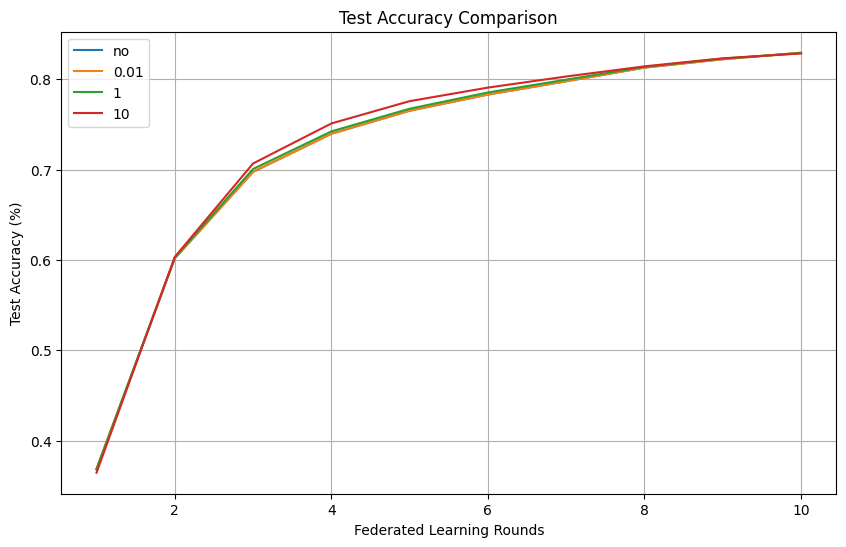

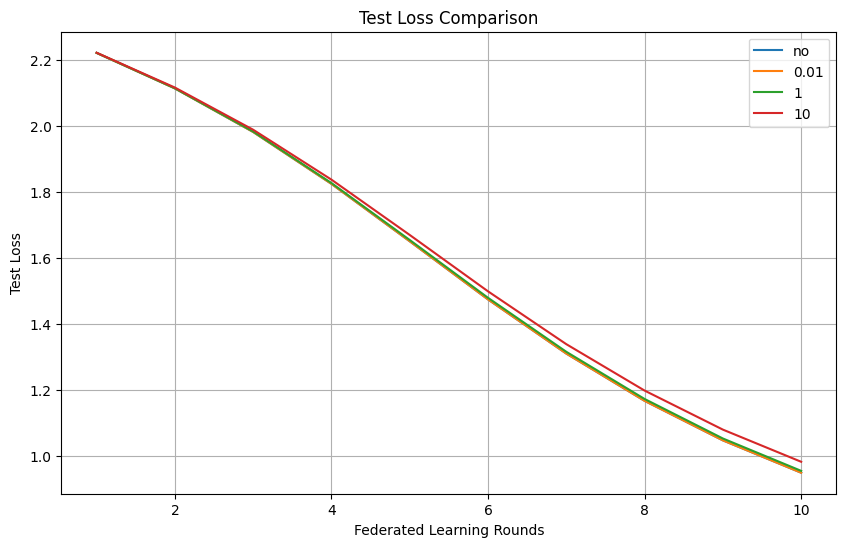

In [45]:
import matplotlib.pyplot as plt

# 定义数据
methods = ['no','0.01', '1','10']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.3686, 0.6017, 0.6974, 0.7396, 0.7651, 0.783, 0.7977, 0.8128, 0.8221, 0.8293]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.3686, 0.6017, 0.6974, 0.7396, 0.7651, 0.783, 0.7977, 0.8128, 0.8221, 0.8293]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.3679, 0.6025, 0.7006, 0.7422, 0.7673, 0.7853, 0.7995, 0.8136, 0.8228, 0.8288]
    },
    '10': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [0.3644, 0.6033, 0.7067, 0.751, 0.7757, 0.7907, 0.803, 0.8142, 0.8231, 0.8285]
    # '100': {
    #     'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #     'y_values': [0.3501, 0.5982, 0.7091, 0.752, 0.1594, 0.098, 0.098, 0.098, 0.098, 0.098]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

methods = ['no','0.01','1','10']
data = {
    'no': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.220270058822632, 2.1127457496643065, 1.980837042617798, 1.8236910903930663, 1.649854062652588, 1.4738350898742676, 1.309857377433777, 1.1667752029418945, 1.0470963131904603, 0.949163321018219]
    },
    '0.01': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.2202700710296632, 2.112745761871338, 1.9808370252609253, 1.8236910398483277, 1.649853893661499, 1.4738348278045654, 1.3098570863723755, 1.16677486410141, 1.0470959920883178, 0.9491629996299744]
    },
    '1': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.220328917312622, 2.113139810180664, 1.9820518953323365, 1.8261944351196289, 1.6537189888000488, 1.478682234954834, 1.3152463960647582, 1.1723974236488341, 1.0527665447235108, 0.9547780534744262]
    },
    '10': {
        'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'y_values': [2.220785145187378, 2.1153048576354982, 1.98755186214447, 1.8364454372406005, 1.6689541591644288, 1.4982899753570558, 1.3383394227981567, 1.1978339921951293, 1.079655593109131, 0.9822888792037964]
    # '100': {
    #     'x_values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #     'y_values': [2.223657808303833, 2.1231269134521487, 2.002906177330017, 1.8686942052841187, 4796.53230703125, nan, nan, nan, nan, nan]
    }
}

# 绘图
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(data[method]['x_values'], data[method]['y_values'], label=method)

# 设置标签和标题
plt.xlabel('Federated Learning Rounds')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()